In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle

In [2]:
df = acquire.get_zillow_data()

Through domain research and choosing features that have enough data (low null values, less than 20%), I've determined these columns to be the most practical to utilize in the data science pipeline for the purpose of predicting tax assessed home values through regression modeling. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52441 non-null  int64  
 1   parcelid                      52441 non-null  int64  
 2   bedroomcnt                    52441 non-null  float64
 3   bathroomcnt                   52441 non-null  float64
 4   calculatedfinishedsquarefeet  52359 non-null  float64
 5   taxvaluedollarcnt             52440 non-null  float64
 6   yearbuilt                     52325 non-null  float64
 7   taxamount                     52437 non-null  float64
 8   fips                          52441 non-null  float64
 9   assessmentyear                52441 non-null  float64
 10  landtaxvaluedollarcnt         52440 non-null  float64
 11  lotsizesquarefeet             52072 non-null  float64
 12  latitude                      52441 non-null  float64
 13  l

In [4]:
df.isna().sum()

Unnamed: 0                        0
parcelid                          0
bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
taxamount                         4
fips                              0
assessmentyear                    0
landtaxvaluedollarcnt             1
lotsizesquarefeet               369
latitude                          0
longitude                         0
dtype: int64

To not lose too much data, I'm looking at columns with many null values and how many null values they share with other columns

In [ ]:
df['calculatedfinishedsquarefeet'].isna().sum() & df['lotsizesquarefeet'].isna().sum() & df['yearbuilt'].isna().sum()

square feet, lot size, and year built share a lot of null rows. This is good news when considering dropping columns with null values.

In [ ]:
df['lotsizesquarefeet'].isna().sum() & df['taxamount'].isna().sum(), df['calculatedfinishedsquarefeet'].isna().sum() & df['taxamount'].isna().sum()

most of tax amount nulls are also square feet nulls so again, feel better about dropping these records

In [ ]:
(df.isnull().sum() / len(df)).round(3) 
#this shows the percentage of null values per column rounded to the 3rd decimal place

we can see that all columns have less than 1% null (missing) values. This is favorable to dropping nulls

In [ ]:
df.isna().mean().sum()
#shows the percentage of missing values in the entire dataframe. 

If all nulls are dropped, we will lose 1% of the data. With this low percentage and seeing how most records with nulls have nulls across other columns, I determine dropping records with nulls is the most appropriate solution

In [5]:
df = wrangle.wrangle_zillow(df)

In [6]:
df

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,latitude,longitude,county
0,0,14297519,4.0,3.5,3100,1023282,1998,11013.72,6059,537569,4506,33634931.0,-117869207.0,orange
1,1,17052889,2.0,1.0,1465,464000,1967,5672.48,6111,376000,12647,34449266.0,-119281531.0,ventura
2,2,14186244,3.0,2.0,1243,564778,1962,6488.30,6059,479489,8432,33886168.0,-117823170.0,orange
3,3,12177905,4.0,3.0,2376,145143,1970,1777.51,6037,36225,13038,34245180.0,-118240722.0,los_angeles
4,4,12095076,4.0,3.0,2962,773303,1950,9516.26,6037,496619,63000,34145202.0,-118179824.0,los_angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,52436,12412492,4.0,2.0,1633,346534,1962,4175.08,6037,221068,4630,33870815.0,-118070858.0,los_angeles
52437,52437,11000655,2.0,2.0,1286,354621,1940,4478.43,6037,283704,47405,34245368.0,-118282383.0,los_angeles
52438,52438,17239384,4.0,2.0,1612,67205,1964,1107.48,6111,16522,12105,34300140.0,-118706327.0,ventura
52439,52439,12773139,3.0,1.0,1032,49546,1954,876.43,6037,16749,5074,34040895.0,-118038169.0,los_angeles


In [7]:
df = wrangle.wrangle_locs(df)

In [ ]:
#df.drop(columns= 'Unnamed: 0', inplace = True)

In [8]:
df

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude
0,0,14297519,4.0,3.5,3100,1023282,1998,11013.72,6059,537569,4506,orange,33.634931,-117.17869207.0
1,1,17052889,2.0,1.0,1465,464000,1967,5672.48,6111,376000,12647,ventura,34.449266,-119.19281531.0
2,2,14186244,3.0,2.0,1243,564778,1962,6488.30,6059,479489,8432,orange,33.886168,-117.17823170.0
3,3,12177905,4.0,3.0,2376,145143,1970,1777.51,6037,36225,13038,los_angeles,34.24518,-118.18240722.0
4,4,12095076,4.0,3.0,2962,773303,1950,9516.26,6037,496619,63000,los_angeles,34.145202,-118.18179824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,52436,12412492,4.0,2.0,1633,346534,1962,4175.08,6037,221068,4630,los_angeles,33.870815,-118.18070858.0
52437,52437,11000655,2.0,2.0,1286,354621,1940,4478.43,6037,283704,47405,los_angeles,34.245368,-118.18282383.0
52438,52438,17239384,4.0,2.0,1612,67205,1964,1107.48,6111,16522,12105,ventura,34.30014,-118.18706327.0
52439,52439,12773139,3.0,1.0,1032,49546,1954,876.43,6037,16749,5074,los_angeles,34.040895,-118.18038169.0


In [9]:
df.value.mean()

508813.64022646466

seeing that tax assessed value mean is very different based on the assessment year, I am dropping 2014 and 2015 assessment year records from the dataframe for consistency

In [ ]:
#df.assessmentyear.value_counts()

Now that all records have the same assessment year (2016), I can drop this column

In [ ]:
#df.drop(columns = ['assessmentyear'], inplace=True)

In [ ]:
df

In [ ]:
# df.rename(columns={'landtaxvaluedollarcnt': 'land_value', 'lotsizesquarefeet': 'lot_size', 'square_feet': 'home_size'}, inplace=True)

In [ ]:
# df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
# df

In [ ]:
# df['land_value'] = df.land_value.astype(int)

In [ ]:
# df['lot_size'] = df.lot_size.astype(int)

### Univariate Exploration

In [ ]:
df.bedrooms.value_counts().sort_values()

In [ ]:
df.bathrooms.value_counts().sort_values()

In [10]:
# put this in wrangle function 

df = df[df.lot_size > 500]
df = df[df.home_size > 500]
df = df[df.value > 10000]

In [11]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
print()
printmd("**Zillow Data (Min, Max, Average)**")
print("--------------------------------")
printmd("**Tax Assessed Value of Home**")
printmd('*Maximum Tax Assessed Value: {:,}*'
     .format(df['value'].max()))
printmd('*Minimum Tax Assessed Value: {:,}*'
     .format(df['value'].min()))
printmd('*Average Tax Assessed Value: {:,}*'
     .format(round(df['value'].mean())))
print("--------------------------------")
printmd("**Tax Amount of Home**")
printmd('*Maximum Tax Amount of Home: {:,}*'
     .format(round(df['tax'].max())))
printmd('*Minimum Tax Amount of Home: {:,}*'
     .format(df['tax'].min()))
printmd('*Average Tax Amount of Home: {:,}*'
     .format(round(df['tax'].mean())))
print("--------------------------------")
printmd("**Home Size in Square Feet**")
printmd('*Maximum Home Size: {:,} square feet*'
     .format(df['home_size'].max()))
printmd('*Minimum Home Size: {:,} square feet*'
     .format(df['home_size'].min()))
printmd('*Average Home Size: {:,} square feet*'
     .format(round(df['home_size'].mean())))
print("--------------------------------")
printmd("**Lot Size in Square Feet**")
printmd('*Maximum Lot Size: {:,} square feet*'
     .format(df['lot_size'].max()))
printmd('*Minimum Lot Size: {:,} square feet*'
     .format(df['lot_size'].min()))
printmd('*Average Lot Size: {:,} square feet*'
     .format(round(df['lot_size'].mean())))
print("--------------------------------")
printmd("**Tax Assessed Land Value**")
printmd('*Maximum Land Value: {:,}*'
     .format(df['land_value'].max()))
printmd('*Minimum Land Value: {:,}*'
     .format(df['land_value'].min()))
printmd('*Average Land Value: {:,}*'
     .format(round(df['land_value'].mean())))

**Zillow Data (Min, Max, Average)**

--------------------------------


**Tax Assessed Value of Home**

*Maximum Tax Assessed Value: 7,900,000*

*Minimum Tax Assessed Value: 10,504*

*Average Tax Assessed Value: 509,166*

--------------------------------


**Tax Amount of Home**

*Maximum Tax Amount of Home: 91,736*

*Minimum Tax Amount of Home: 49.18*

*Average Tax Amount of Home: 6,204*

--------------------------------


**Home Size in Square Feet**

*Maximum Home Size: 12,616 square feet*

*Minimum Home Size: 501 square feet*

*Average Home Size: 1,906 square feet*

--------------------------------


**Lot Size in Square Feet**

*Maximum Lot Size: 6,971,010 square feet*

*Minimum Lot Size: 540 square feet*

*Average Lot Size: 11,159 square feet*

--------------------------------


**Tax Assessed Land Value**

*Maximum Land Value: 7,073,604*

*Minimum Land Value: 161*

*Average Land Value: 319,731*

<AxesSubplot:title={'center':'bedroom count'}, xlabel='bedrooms', ylabel='count'>

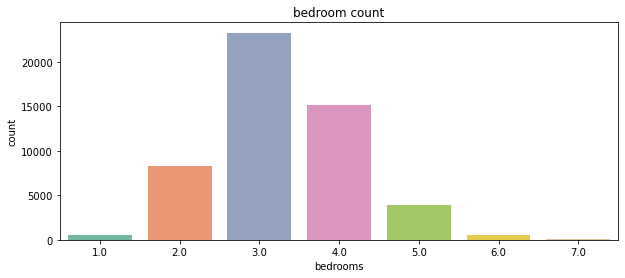

In [12]:
plt.figure(figsize=(10, 4))
sns.set_palette('Set2', 8)
plt.title('bedroom count')
sns.countplot(x = 'bedrooms', data= df)

Text(0.5, 1.0, 'bathroom count')

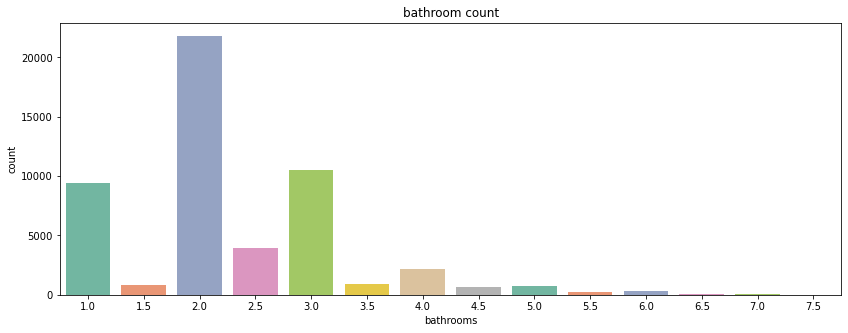

In [13]:
plt.figure(figsize=(14, 5))
sns.set_palette('Set2', 20)
sns.countplot(x='bathrooms', data=df)
plt.title('bathroom count')

In [14]:
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from math import sqrt
from scipy import stats

In [15]:
# make this a function
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.3, random_state=123)

In [ ]:
train.info()

In [ ]:
orange_train = train.copy()

In [ ]:
ventura_train = train.copy()

In [ ]:
la_train = train.copy()

In [ ]:
orange_train = orange_train[orange_train.county == 'orange']

In [ ]:
orange_train

In [ ]:
ventura_train = ventura_train[ventura_train.county == 'ventura']

In [ ]:
la_train = la_train[la_train.county == 'los_angeles']

In [ ]:
ventura_train.to_csv("ventura_locations.csv")
la_train.to_csv("la_locations.csv")
orange_train.to_csv("orange_locations.csv")

In [ ]:
ventura_train.info()

In [ ]:
ventura_train['latitude'] = ventura_train.latitude.astype(str)

In [ ]:
ventura_train['latitude'].dtype

In [ ]:
ventura_train['latitude'] = np.where(ventura_train['latitude']==' ',0, ventura_train['latitude']).astype(float)

In [ ]:
ventura_train['longitude'] = ventura_train.longitude.astype(str)

In [ ]:
ventura_train['longitude'] = ventura_train['longitude'].str.rstrip('.0') 

In [ ]:
ventura_train['longitude']

In [ ]:
ventura_train['longitude'] = np.where(ventura_train['longitude']==' ',0, ventura_train['longitude']).astype(float)

In [16]:
import geopy

In [ ]:
# def get_zipcode(ventura_train, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((ventura_train['latitude'], ventura_train['longitude']))
#     return location.raw['address']['postcode']

# geolocator = geopy.Nominatim(user_agent='mlshiben')

In [ ]:
ventura_train.get('latitude')

In [17]:
import geocoder

In [ ]:
# def geo_rev(ventura_train):
#     g = geocoder.osm([ventura_train.latitude, ventura_train.longitude], method='reverse').json
#     if g:
#         return g.get('postal')
#     else:
#         return 'no postal'

# ventura_train[['latitude', 'longitude']].apply(geo_rev, axis=1)


In [ ]:
# g = geocoder.osm(ventura_train['latitude'], ventura_train['longitude']), method='reverse')
# g.json['postal']

In [ ]:
# zipcodes = ventura_train.apply(get_zipcode, geolocator=geolocator, lat_field ='latitude', lon_field = 'longitude')

In [ ]:
# ventura_train.info()

In [ ]:
# sample = ventura_train.copy()

In [ ]:
# sample.value.quantile(.999)

In [ ]:
# sample = sample[sample.value > 3843389]

In [ ]:
# def geo_rev(sample):
#     g = geocoder.osm([sample.latitude, sample.longitude], method='reverse').json
#     if g:
#         return g.get('postal')
#     else:
#         return 'no postal'

# zips = sample[['latitude', 'longitude']].apply(geo_rev, axis=1)

In [18]:
import plotly.express as px

In [19]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

clustering = DBSCAN(eps=15, min_samples=5).fit(coords)

In [ ]:
#labels = clustering.labels_

In [ ]:
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# n_noise

In [ ]:
# fig = px.scatter_geo(sample,lat='latitude',lon='longitude')
# fig.show()

In [20]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=100)

In [ ]:
coords = train[['latitude', 'longitude']].to_numpy()

In [ ]:

# save results
label = kmeans.fit_predict(coords)
label.min()
label.max()

In [ ]:
filtered_label0 = ventura_train[label == 0]
filtered_label1 = ventura_train[label == 1]
filtered_label2 = ventura_train[label == 2]
filtered_label3 = ventura_train[label == 3]
filtered_label4 = ventura_train[label == 4]
filtered_label5 = ventura_train[label == 5]
 
#Plotting the results
plt.scatter(filtered_label0.latitude , filtered_label0.longitude, color = 'red')
plt.scatter(filtered_label1.latitude , filtered_label1.longitude, color = 'black')
plt.show()


In [ ]:
ventura_train

In [ ]:
vdf = pd.DataFrame([[]])
#= ventura_train.latitude.where(ventura_train.KM_label == 1).mean()
vdf

In [ ]:
vdf['label'] = ventura_train['KM_label'].copy()

In [ ]:
v0 = ventura_train.latitude.where(ventura_train.KM_label == 0).mean()
v1 = ventura_train.latitude.where(ventura_train.KM_label == 1).mean()
v2 = ventura_train.latitude.where(ventura_train.KM_label == 2).mean()
v3 = ventura_train.latitude.where(ventura_train.KM_label == 3).mean()
v4 = ventura_train.latitude.where(ventura_train.KM_label == 4).mean()
v5 = ventura_train.latitude.where(ventura_train.KM_label == 5).mean()

l0 = ventura_train.longitude.where(ventura_train.KM_label == 0).mean()
l1 = ventura_train.longitude.where(ventura_train.KM_label == 1).mean()
l2 = ventura_train.longitude.where(ventura_train.KM_label == 2).mean()
l3 = ventura_train.longitude.where(ventura_train.KM_label == 3).mean()
l4 = ventura_train.longitude.where(ventura_train.KM_label == 4).mean()
l5 = ventura_train.longitude.where(ventura_train.KM_label == 5).mean()

a0 = ventura_train.value.where(ventura_train.KM_label == 0).mean()
a1 = ventura_train.value.where(ventura_train.KM_label == 1).mean()
a2 = ventura_train.value.where(ventura_train.KM_label == 2).mean()
a3 = ventura_train.value.where(ventura_train.KM_label == 3).mean()
a4 = ventura_train.value.where(ventura_train.KM_label == 4).mean()
a5 = ventura_train.value.where(ventura_train.KM_label == 5).mean()


In [ ]:
vdf = pd.DataFrame({'bin': [0, 1, 2, 3, 4, 5], 'a_lat': [v0, v1, v2, v3, v4, v5], 'a_lon': [l0, l1, l2, l3, l4, l5], 'v': [a0, a1, a2, a3, a4, a5]})
vdf

In [ ]:
vdf['v'] = round(vdf.v).astype(str)

In [ ]:
vdf['v'] = vdf.v.astype(float)

In [ ]:
vdf['v'] = vdf.apply(lambda x: "{:,}".format(x['v']), axis=1)

In [ ]:
vdf.v

In [ ]:
vdf['v'] = '$' + vdf['v']

In [ ]:
vdf.v

In [ ]:
vdf['v'] = vdf["v"].str[:-2]

In [ ]:
vdf

In [ ]:
fig = px.scatter_geo(vdf, lat='a_lat', lon='a_lon', color="bin", text='v', hover_data= 'v',
            locationmode = 'USA-states')

fig.update_traces(marker=dict(size=15))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue")

fig.show()

In [ ]:
orange_train

In [ ]:
la_train

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters= 12)

In [ ]:
orange_train['latitude'] = np.where(orange_train['latitude']==' ',0, orange_train['latitude']).astype(float)

In [ ]:
orange_train['longitude'] = orange_train['longitude'].astype(str)

In [ ]:
orange_train['longitude'] = orange_train['longitude'].str[:-2] 

In [ ]:
orange_train['latitude'] = orange_train['latitude'].astype(float)

In [ ]:
orange_train['longitude'] = orange_train['longitude'].astype(float)

In [ ]:
coords = orange_train[['latitude', 'longitude']].to_numpy()

In [ ]:
label = kmeans.fit_predict(coords)

In [ ]:
orange_train['KM_label'] = pd.Series(label, index=orange_train.index)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters= 12)

In [ ]:
la_train['latitude'] = np.where(la_train['latitude']==' ',0, la_train['latitude']).astype(float)

In [ ]:
la_train['longitude'] = la_train['longitude'].astype(str)

In [ ]:
la_train['longitude'] = la_train['longitude'].str[:-2] 

In [ ]:
la_train['latitude'] = la_train['latitude'].astype(float)

In [ ]:
la_train['longitude'] = la_train['longitude'].astype(float)

In [ ]:
coords = la_train[['latitude', 'longitude']].to_numpy()

In [ ]:
label = kmeans.fit_predict(coords)

In [ ]:
#label.max()

In [ ]:
la_train['KM_label'] = pd.Series(label, index=la_train.index)

In [ ]:
la_train

In [ ]:
la_train

In [24]:
train['latitude'] = np.where(train['latitude']==' ',0, train['latitude']).astype(float)
validate['latitude'] = np.where(validate['latitude']==' ',0, validate['latitude']).astype(float)
test['latitude'] = np.where(test['latitude']==' ',0, test['latitude']).astype(float)

In [25]:
train['longitude'] = train['longitude'].astype(str)
validate['longitude'] = validate['longitude'].astype(str)
test['longitude'] = test['longitude'].astype(str)

In [26]:
train['longitude'] = train['longitude'].str[:-2] 
validate['longitude'] = validate['longitude'].str[:-2] 
test['longitude'] = test['longitude'].str[:-2] 

In [27]:
train['latitude'] = train['latitude'].astype(float)
validate['latitude'] = validate['latitude'].astype(float)
test['latitude'] = test['latitude'].astype(float)

In [28]:
train['longitude'] = train['longitude'].astype(float)
validate['longitude'] = validate['longitude'].astype(float)
test['longitude'] = test['longitude'].astype(float)

In [ ]:
train['KM_label'] = pd.Series(label, index= train.index)

In [ ]:
train

In [ ]:
A0 = train.latitude.where(train.KM_label == 0).mean()
A1 = train.latitude.where(train.KM_label == 1).mean()
A2 = train.latitude.where(train.KM_label == 2).mean()
A3 = train.latitude.where(train.KM_label == 3).mean()
A4 = train.latitude.where(train.KM_label == 4).mean()
A5 = train.latitude.where(train.KM_label == 5).mean()
A6 = train.latitude.where(train.KM_label == 6).mean()
A7 = train.latitude.where(train.KM_label == 7).mean()
A8 = train.latitude.where(train.KM_label == 8).mean()
A9 = train.latitude.where(train.KM_label == 9).mean()
A10 = train.latitude.where(train.KM_label == 10).mean()
A11 = train.latitude.where(train.KM_label == 11).mean()
A12 = train.latitude.where(train.KM_label == 12).mean()
A13 = train.latitude.where(train.KM_label == 13).mean()
A14 = train.latitude.where(train.KM_label == 14).mean()
A15 = train.latitude.where(train.KM_label == 15).mean()
A16 = train.latitude.where(train.KM_label == 16).mean()
A17 = train.latitude.where(train.KM_label == 17).mean()
A18 = train.latitude.where(train.KM_label == 18).mean()
A19 = train.latitude.where(train.KM_label == 19).mean()
A20 = train.latitude.where(train.KM_label == 20).mean()
A21 = train.latitude.where(train.KM_label == 21).mean()

B0 = train.longitude.where(train.KM_label == 0).mean()
B1 = train.longitude.where(train.KM_label == 1).mean()
B2 = train.longitude.where(train.KM_label == 2).mean()
B3 = train.longitude.where(train.KM_label == 3).mean()
B4 = train.longitude.where(train.KM_label == 4).mean()
B5 = train.longitude.where(train.KM_label == 5).mean()
B6 = train.longitude.where(train.KM_label == 6).mean()
B7 = train.longitude.where(train.KM_label == 7).mean()
B8 = train.longitude.where(train.KM_label == 8).mean()
B9 = train.longitude.where(train.KM_label == 9).mean()
B10 = train.longitude.where(train.KM_label == 10).mean()
B11 = train.longitude.where(train.KM_label == 11).mean()
B12 = train.longitude.where(train.KM_label == 12).mean()
B13 = train.longitude.where(train.KM_label == 13).mean()
B14 = train.longitude.where(train.KM_label == 14).mean()
B15 = train.longitude.where(train.KM_label == 15).mean()
B16 = train.longitude.where(train.KM_label == 16).mean()
B17 = train.longitude.where(train.KM_label == 17).mean()
B18 = train.longitude.where(train.KM_label == 18).mean()
B19 = train.longitude.where(train.KM_label == 19).mean()
B20 = train.longitude.where(train.KM_label == 20).mean()
B21 = train.longitude.where(train.KM_label == 21).mean()

V0 = train.value.where(train.KM_label == 0).mean()
V1 = train.value.where(train.KM_label == 1).mean()
V2 = train.value.where(train.KM_label == 2).mean()
V3 = train.value.where(train.KM_label == 3).mean()
V4 = train.value.where(train.KM_label == 4).mean()
V5 = train.value.where(train.KM_label == 5).mean()
V6 = train.value.where(train.KM_label == 6).mean()
V7 = train.value.where(train.KM_label == 7).mean()
V8 = train.value.where(train.KM_label == 8).mean()
V9 = train.value.where(train.KM_label == 9).mean()
V10 = train.value.where(train.KM_label == 10).mean()
V11 = train.value.where(train.KM_label == 11).mean()
V12 = train.value.where(train.KM_label == 12).mean()
V13 = train.value.where(train.KM_label == 13).mean()
V14 = train.value.where(train.KM_label == 14).mean()
V15 = train.value.where(train.KM_label == 15).mean()
V16 = train.value.where(train.KM_label == 16).mean()
V17 = train.value.where(train.KM_label == 17).mean()
V18 = train.value.where(train.KM_label == 18).mean()
V19 = train.value.where(train.KM_label == 19).mean()
V20 = train.value.where(train.KM_label == 20).mean()
V21 = train.value.where(train.KM_label == 21).mean()

In [ ]:
mapdf = pd.DataFrame({'bin': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'lat': [A0, A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15, A16, A17, A18, A19, A20, A21], 'lon': [B0, B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12, B13, B14, B15, B16, B17, B18, B19, B20, B21], 'v': [V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21]})
mapdf


In [ ]:
fig = px.scatter_geo(mapdf, lat='lat', lon='lon', color="bin", hover_data= 'v',
            locationmode = 'USA-states')

fig.update_traces(marker=dict(size=20))
fig.update_geos(
    visible=True, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue")


fig.show()

In [ ]:
OA0 = orange_train.latitude.where(orange_train.KM_label == 0).mean()
OA1 = orange_train.latitude.where(orange_train.KM_label == 1).mean()
OA2 = orange_train.latitude.where(orange_train.KM_label == 2).mean()
OA3 = orange_train.latitude.where(orange_train.KM_label == 3).mean()
OA4 = orange_train.latitude.where(orange_train.KM_label == 4).mean()
OA5 = orange_train.latitude.where(orange_train.KM_label == 5).mean()
OA6 = orange_train.latitude.where(orange_train.KM_label == 6).mean()
OA7 = orange_train.latitude.where(orange_train.KM_label == 7).mean()
OA8 = orange_train.latitude.where(orange_train.KM_label == 8).mean()
OA9 = orange_train.latitude.where(orange_train.KM_label == 9).mean()
OA10 = orange_train.latitude.where(orange_train.KM_label == 10).mean()
OA11 = orange_train.latitude.where(orange_train.KM_label == 11).mean()


OB0 = orange_train.longitude.where(orange_train.KM_label == 0).mean()
OB1 = orange_train.longitude.where(orange_train.KM_label == 1).mean()
OB2 = orange_train.longitude.where(orange_train.KM_label == 2).mean()
OB3 = orange_train.longitude.where(orange_train.KM_label == 3).mean()
OB4 = orange_train.longitude.where(orange_train.KM_label == 4).mean()
OB5 = orange_train.longitude.where(orange_train.KM_label == 5).mean()
OB6 = orange_train.longitude.where(orange_train.KM_label == 6).mean()
OB7 = orange_train.longitude.where(orange_train.KM_label == 7).mean()
OB8 = orange_train.longitude.where(orange_train.KM_label == 8).mean()
OB9 = orange_train.longitude.where(orange_train.KM_label == 9).mean()
OB10 = orange_train.longitude.where(orange_train.KM_label == 10).mean()
OB11 = orange_train.longitude.where(orange_train.KM_label == 11).mean()

OV0 = orange_train.value.where(orange_train.KM_label == 0).mean()
OV1 = orange_train.value.where(orange_train.KM_label == 1).mean()
OV2 = orange_train.value.where(orange_train.KM_label == 2).mean()
OV3 = orange_train.value.where(orange_train.KM_label == 3).mean()
OV4 = orange_train.value.where(orange_train.KM_label == 4).mean()
OV5 = orange_train.value.where(orange_train.KM_label == 5).mean()
OV6 = orange_train.value.where(orange_train.KM_label == 6).mean()
OV7 = orange_train.value.where(orange_train.KM_label == 7).mean()
OV8 = orange_train.value.where(orange_train.KM_label == 8).mean()
OV9 = orange_train.value.where(orange_train.KM_label == 9).mean()
OV10 = orange_train.value.where(orange_train.KM_label == 10).mean()
OV11 = orange_train.value.where(orange_train.KM_label == 11).mean()

VA0 = ventura_train.latitude.where(ventura_train.KM_label == 0).mean()
VA1 = ventura_train.latitude.where(ventura_train.KM_label == 1).mean()
VA2 = ventura_train.latitude.where(ventura_train.KM_label == 2).mean()
VA3 = ventura_train.latitude.where(ventura_train.KM_label == 3).mean()
VA4 = ventura_train.latitude.where(ventura_train.KM_label == 4).mean()
VA5 = ventura_train.latitude.where(ventura_train.KM_label == 5).mean()

VB0 = ventura_train.longitude.where(ventura_train.KM_label == 0).mean()
VB1 = ventura_train.longitude.where(ventura_train.KM_label == 1).mean()
VB2 = ventura_train.longitude.where(ventura_train.KM_label == 2).mean()
VB3 = ventura_train.longitude.where(ventura_train.KM_label == 3).mean()
VB4 = ventura_train.longitude.where(ventura_train.KM_label == 4).mean()
VB5 = ventura_train.longitude.where(ventura_train.KM_label == 5).mean()

VV0 = ventura_train.value.where(ventura_train.KM_label == 0).mean()
VV1 = ventura_train.value.where(ventura_train.KM_label == 1).mean()
VV2 = ventura_train.value.where(ventura_train.KM_label == 2).mean()
VV3 = ventura_train.value.where(ventura_train.KM_label == 3).mean()
VV4 = ventura_train.value.where(ventura_train.KM_label == 4).mean()
VV5 = ventura_train.value.where(ventura_train.KM_label == 5).mean()

LA0 = la_train.latitude.where(la_train.KM_label == 0).mean()
LA1 = la_train.latitude.where(la_train.KM_label == 1).mean()
LA2 = la_train.latitude.where(la_train.KM_label == 2).mean()
LA3 = la_train.latitude.where(la_train.KM_label == 3).mean()
LA4 = la_train.latitude.where(la_train.KM_label == 4).mean()
LA5 = la_train.latitude.where(la_train.KM_label == 5).mean()
LA6 = la_train.latitude.where(la_train.KM_label == 6).mean()
LA7 = la_train.latitude.where(la_train.KM_label == 7).mean()
LA8 = la_train.latitude.where(la_train.KM_label == 8).mean()
LA9 = la_train.latitude.where(la_train.KM_label == 9).mean()
LA10 = la_train.latitude.where(la_train.KM_label == 10).mean()
LA11 = la_train.latitude.where(la_train.KM_label == 11).mean()


LB0 = la_train.longitude.where(la_train.KM_label == 0).mean()
LB1 = la_train.longitude.where(la_train.KM_label == 1).mean()
LB2 = la_train.longitude.where(la_train.KM_label == 2).mean()
LB3 = la_train.longitude.where(la_train.KM_label == 3).mean()
LB4 = la_train.longitude.where(la_train.KM_label == 4).mean()
LB5 = la_train.longitude.where(la_train.KM_label == 5).mean()
LB6 = la_train.longitude.where(la_train.KM_label == 6).mean()
LB7 = la_train.longitude.where(la_train.KM_label == 7).mean()
LB8 = la_train.longitude.where(la_train.KM_label == 8).mean()
LB9 = la_train.longitude.where(la_train.KM_label == 9).mean()
LB10 = la_train.longitude.where(la_train.KM_label == 10).mean()
LB11 = la_train.longitude.where(la_train.KM_label == 11).mean()

LV0 = la_train.value.where(la_train.KM_label == 0).mean()
LV1 = la_train.value.where(la_train.KM_label == 1).mean()
LV2 = la_train.value.where(la_train.KM_label == 2).mean()
LV3 = la_train.value.where(la_train.KM_label == 3).mean()
LV4 = la_train.value.where(la_train.KM_label == 4).mean()
LV5 = la_train.value.where(la_train.KM_label == 5).mean()
LV6 = la_train.value.where(la_train.KM_label == 6).mean()
LV7 = la_train.value.where(la_train.KM_label == 7).mean()
LV8 = la_train.value.where(la_train.KM_label == 8).mean()
LV9 = la_train.value.where(la_train.KM_label == 9).mean()
LV10 = la_train.value.where(la_train.KM_label == 10).mean()
LV11 = la_train.value.where(la_train.KM_label == 11).mean()

In [ ]:
vdf = pd.DataFrame({'bin': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'a_lat': [OA0, OA1, OA2, OA3, OA4, OA5, OA6, OA7, OA8,OA9, OA10, OA11, VA0, VA1, VA2, VA3, VA4, VA5, LA0, LA1, LA2, LA3, LA4, LA5, LA6, LA7, LA8, LA9, LA10, LA11], 'a_lon': [OB0, OB1, OB2, OB3, OB4, OB5, OB6, OB7, OB8, OB9, OB10, OB11, VB0, VB1, VB2, VB3, VB4, VB5, LB0, LB1, LB2, LB3, LB4, LB5, LB6, LB7, LB8,LB9, LB10, LB11], 'v': [OV0, OV1, OV2, OV3, OV4, OV5, OV6, OV7, OV8, OV9, OV10, OV11, VV0, VV1, VV2, VV3, VV4, VV5, LV0, LV1, LV2, LV3, LV4, LV5, LV6, LV7, LV8,LV9, LV10, LV11]})
vdf

In [ ]:
fig = px.scatter_geo(vdf, lat='a_lat', lon='a_lon', color="bin", hover_data= 'v',
            locationmode = 'USA-states')

fig.update_traces(marker=dict(size=30))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue")


fig.show()

In [ ]:
orange_train['KM_label'] = orange_train['KM_label'].astype(str)
ventura_train['KM_label'] = ventura_train['KM_label'].astype(str)
la_train['KM_label'] = la_train['KM_label'].astype(str)

In [ ]:
#orange_train['KM_label'] = 'orange_' + orange_train['KM_label'].astype(str)
ventura_train['KM_label'] = 'ventura_' + ventura_train['KM_label'].astype(str)
la_train['KM_label'] = 'la_' + la_train['KM_label'].astype(str)

In [ ]:
la_train

In [ ]:
train = pd.concat([orange_train, la_train, ventura_train])

In [ ]:
train

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

In [62]:
kmeans = KMeans(
    init="random",
    n_clusters= 22)
coords_1 = train[['latitude', 'longitude']].to_numpy()
label_1 = kmeans.fit_predict(coords_1)
train['KM_label_train'] = pd.Series(label_1, index=train.index)

In [63]:
coords_2 = validate[['latitude', 'longitude']].to_numpy()
label_2 = kmeans.fit_predict(coords_2)
validate['KM_label_val'] = pd.Series(label_2, index=validate.index)

In [64]:
coords_3 = test[['latitude', 'longitude']].to_numpy()
label_3 = kmeans.fit_predict(coords_3)
test['KM_label_test'] = pd.Series(label_3, index=test.index)

In [65]:
f_selector = SelectKBest(f_regression, k=5)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28940 entries, 50339 to 9813
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28940 non-null  int64  
 1   parcelid    28940 non-null  int64  
 2   bedrooms    28940 non-null  float64
 3   bathrooms   28940 non-null  float64
 4   home_size   28940 non-null  int64  
 5   value       28940 non-null  int64  
 6   year        28940 non-null  int64  
 7   tax         28940 non-null  float64
 8   fips        28940 non-null  int64  
 9   land_value  28940 non-null  int64  
 10  lot_size    28940 non-null  int64  
 11  county      28940 non-null  object 
 12  latitude    28940 non-null  float64
 13  longitude   28940 non-null  float64
 14  KM_label    28940 non-null  int32  
dtypes: float64(5), int32(1), int64(8), object(1)
memory usage: 3.4+ MB


In [49]:
train

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude,KM_label
50339,50339,12435056,3.0,2.0,1547,91062,1953,1329.02,6037,33520,4982,los_angeles,33.821634,-118.180944,21
28375,28375,12114836,5.0,2.0,2238,294404,1910,3702.98,6037,166496,10913,los_angeles,34.160779,-118.181243,12
46916,46916,12350784,5.0,5.0,4642,684719,1953,8354.42,6037,173524,7605,los_angeles,33.940562,-118.181111,16
20158,20158,14262921,3.0,2.0,1356,180208,1964,2277.76,6059,97817,6002,orange,33.721196,-117.178914,14
18052,18052,14185319,3.0,2.0,1619,442099,1968,5074.14,6059,349658,6200,orange,33.868299,-117.178110,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42940,42940,10996357,4.0,3.0,2045,519807,1968,6429.02,6037,340413,6009,los_angeles,34.264051,-118.182954,18
46851,46851,11279183,2.0,2.0,1093,163100,1955,2703.78,6037,41100,6983,los_angeles,34.690405,-118.181527,19
52419,52419,12651460,2.0,1.0,960,443726,1923,5423.02,6037,354981,4500,los_angeles,33.732661,-118.183019,0
44865,44865,14207326,4.0,3.0,2824,620304,1998,7927.78,6059,293459,10402,orange,33.871625,-117.177743,10


In [66]:
X_train = train.drop(columns=['parcelid','tax', 'value', 'county', 'fips', 'land_value'])
y_train = train.value

In [67]:
f_selector.fit(X_train, y_train)

feature_mask = f_selector.get_support()

f_feature = X_train.iloc[:,feature_mask].columns.tolist()

f_feature

['bedrooms', 'bathrooms', 'home_size', 'year', 'latitude']

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(X_train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

rfe_feature

['bedrooms',
 'bathrooms',
 'latitude',
 'longitude',
 'KM_label',
 'KM_label_train']

In [70]:
validate

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude,KM_label,KM_label_val
44525,44525,14429342,3.0,3.5,3570,1567500,1981,17176.76,6059,1148822,8740,orange,33.479963,-117.177101,7,2
6775,6775,12434332,2.0,1.0,832,310658,1956,3676.80,6037,176143,3720,los_angeles,33.824342,-118.180770,16,10
9645,9645,14014466,3.0,2.0,1823,89265,1956,1251.94,6059,23256,6100,orange,33.841410,-118.180065,16,10
9198,9198,11317236,4.0,2.0,1640,147412,1997,2708.29,6037,26969,7613,los_angeles,34.685844,-118.182403,2,18
44594,44594,11995701,3.0,2.0,1625,832186,1924,10120.81,6037,676152,4805,los_angeles,34.080824,-118.183394,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30968,30968,12750753,4.0,2.0,2334,302804,1955,4052.10,6037,132158,6537,los_angeles,33.895731,-118.180016,0,17
38074,38074,13993374,4.0,2.0,1502,353679,1956,4303.78,6059,274094,6360,orange,33.825341,-117.179498,21,7
4354,4354,13911823,3.0,2.0,1372,52238,1956,850.64,6059,22189,6324,orange,33.853186,-117.179593,21,4
52263,52263,11847928,4.0,2.0,1663,587731,1952,7975.96,6037,462904,7389,los_angeles,34.044570,-118.181374,6,14


In [ ]:
# from datetime import datetime, timezone

# def utc_to_local(utc_dt):
#     return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz='America/Denver')


In [ ]:
# naive = datetime.now()

# timezone = pytz.timezone('America/Denver')
# aware1 = timezone.localize(naive)
 
# # Calling the utcoffset() function
# # over the above localized time
# print("Time ahead of UTC by:", aware1.utcoffset())

In [ ]:
# from datetime import datetime
# import pytz

# born = datetime(1990, 6, 22) # provide UTC time
# age = timezone.zone() - born
# print('Rob has been alive for: {:,} seconds!!!'.format(age.total_seconds()))

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [72]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="mshiben")

reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)


In [ ]:
train.to_csv("train_locs.csv")

In [ ]:
def geo_rev(train):
    g = geocoder.osm([train.latitude, train.longitude], method='reverse', language='en').json
    if g:
        return g.get('postal')
    else:
        return 'no postal'

train['zips'] = train[['latitude', 'longitude']].apply(geo_rev, axis=1)

In [ ]:
sampletrain

In [ ]:
sampletrain = train.iloc[ :10 ]

In [ ]:
sampletrain

In [ ]:
sns.barplot(data = ventura_train, x= 'KM_label', y= 'value')

In [ ]:
orange_train

In [ ]:
sns.barplot(data = orange_train, x= 'KM_label', y= 'value')

In [73]:
import sklearn.preprocessing

In [ ]:
# train['KM_label'] = pd.Series(label, index= train.index)
# validate['KM_label'] = pd.Series(label, index= train.index)
# test['KM_label'] = pd.Series(label, index= train.index)

In [74]:
train

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude,KM_label,KM_label_train
50339,50339,12435056,3.0,2.0,1547,91062,1953,1329.02,6037,33520,4982,los_angeles,33.821634,-118.180944,10,21
28375,28375,12114836,5.0,2.0,2238,294404,1910,3702.98,6037,166496,10913,los_angeles,34.160779,-118.181243,1,18
46916,46916,12350784,5.0,5.0,4642,684719,1953,8354.42,6037,173524,7605,los_angeles,33.940562,-118.181111,6,20
20158,20158,14262921,3.0,2.0,1356,180208,1964,2277.76,6059,97817,6002,orange,33.721196,-117.178914,0,11
18052,18052,14185319,3.0,2.0,1619,442099,1968,5074.14,6059,349658,6200,orange,33.868299,-117.178110,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42940,42940,10996357,4.0,3.0,2045,519807,1968,6429.02,6037,340413,6009,los_angeles,34.264051,-118.182954,7,5
46851,46851,11279183,2.0,2.0,1093,163100,1955,2703.78,6037,41100,6983,los_angeles,34.690405,-118.181527,12,15
52419,52419,12651460,2.0,1.0,960,443726,1923,5423.02,6037,354981,4500,los_angeles,33.732661,-118.183019,10,17
44865,44865,14207326,4.0,3.0,2824,620304,1998,7927.78,6059,293459,10402,orange,33.871625,-117.177743,8,7


In [75]:

train = train.drop(columns=['county', 'KM_label'])
validate = validate.drop(columns=['county', 'KM_label'])
test = test.drop(columns = ['county', 'KM_label'])

In [76]:
train = train.drop(columns =['Unnamed: 0', 'parcelid'])
validate = validate.drop(columns =['Unnamed: 0', 'parcelid'])
test = test.drop(columns =['Unnamed: 0', 'parcelid'])

In [77]:
scaler = sklearn.preprocessing.StandardScaler()

In [78]:
scaler.fit(train)

StandardScaler()

In [79]:
scaled_train = pd.DataFrame(data=scaler.transform(train))
scaled_validate = pd.DataFrame(data=scaler.transform(validate))
scaled_test = pd.DataFrame(data=scaler.transform(test))

In [81]:
X_train = train[['bedrooms', 'bathrooms', 'KM_label_train', 'home_size', 'year']]
y_train = train.value

X_validate = validate[['bedrooms', 'bathrooms', 'KM_label_val', 'home_size', 'year']]
y_validate = validate.value

X_test = test[['bedrooms', 'bathrooms', 'KM_label_test', 'home_size', 'year']]
y_test = test.value

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [83]:
y_train.dtypes

dtype('int64')

In [84]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [85]:
y_validate.mean()

value    505015.939133
dtype: float64

In [86]:
y_train['pred_mean'] = y_train.value.mean()
y_validate['pred_mean'] = y_validate.value.mean()

In [87]:
y_train['pred_median'] = y_train.value.median()
y_validate['pred_median'] = y_train.value.median()

In [88]:
X_train

,bedrooms,bathrooms,KM_label_train,home_size,year
50339,3.0,2.0,21,1547,1953
28375,5.0,2.0,18,2238,1910
46916,5.0,5.0,20,4642,1953
20158,3.0,2.0,11,1356,1964
18052,3.0,2.0,7,1619,1968
...,...,...,...,...,...
42940,4.0,3.0,5,2045,1968
46851,2.0,2.0,15,1093,1955
52419,2.0,1.0,17,960,1923
44865,4.0,3.0,7,2824,1998


In [89]:
rmse_train = mean_squared_error(y_train.value, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  566940.84 
Validate/Out-of-Sample:  553689.08


In [90]:
rmse_train = mean_squared_error(y_train.value, y_train.pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  583202.57 
Validate/Out-of-Sample:  569467.22


In [91]:
X_validate

,bedrooms,bathrooms,KM_label_val,home_size,year
44525,3.0,3.5,2,3570,1981
6775,2.0,1.0,10,832,1956
9645,3.0,2.0,10,1823,1956
9198,4.0,2.0,18,1640,1997
44594,3.0,2.0,11,1625,1924
...,...,...,...,...,...
30968,4.0,2.0,17,2334,1955
38074,4.0,2.0,7,1502,1956
4354,3.0,2.0,4,1372,1956
52263,4.0,2.0,14,1663,1952


In [92]:
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.value)

# predict train
y_train['value_predict_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.value_predict_lm)**(1/2)

# predict validate
y_validate['value_predict_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.value, y_validate.value_predict_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  434485.2492419352 
Validation/Out-of-Sample:  425901.09171376366


In [93]:
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.value)

# predict train
y_train['pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.pred_lars)**(1/2)

# predict validate
y_validate['pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  434485.57248620316 
Validation/Out-of-Sample:  425880.03923692746


In [143]:
glm = TweedieRegressor(power=1, alpha=6)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.value)

# predict train
y_train['pred_value_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.pred_value_glm)**(1/2)

# predict validate
y_validate['pred_value_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_value_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  566940.8438019488 
Validation/Out-of-Sample:  553701.0370458176


In [127]:
from sklearn.linear_model import LinearRegression


# compute predictions and add to original dataframe
train['yhat'] = glm.predict(X_train).round()

train

,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,latitude,longitude,KM_label_train,yhat,residual,yhat_baseline,residual_baseline,residual^2,residual_baseline^2
50339,3.0,2.0,1547,91062,1953,1329.02,6037,33520,4982,33.821634,-118.180944,21,508655.0,275246.0,508654.57671,417592.57671,7.576036e+10,1.743836e+11
28375,5.0,2.0,2238,294404,1910,3702.98,6037,166496,10913,34.160779,-118.181243,18,508655.0,236872.0,508654.57671,214250.57671,5.610834e+10,4.590331e+10
46916,5.0,5.0,4642,684719,1953,8354.42,6037,173524,7605,33.940562,-118.181111,20,508655.0,943551.0,508654.57671,-176064.42329,8.902885e+11,3.099868e+10
20158,3.0,2.0,1356,180208,1964,2277.76,6059,97817,6002,33.721196,-117.178914,11,508655.0,124470.0,508654.57671,328446.57671,1.549278e+10,1.078772e+11
18052,3.0,2.0,1619,442099,1968,5074.14,6059,349658,6200,33.868299,-117.178110,7,508655.0,-35446.0,508654.57671,66555.57671,1.256419e+09,4.429645e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42940,4.0,3.0,2045,519807,1968,6429.02,6037,340413,6009,34.264051,-118.182954,5,508655.0,51826.0,508654.57671,-11152.42329,2.685934e+09,1.243765e+08
46851,2.0,2.0,1093,163100,1955,2703.78,6037,41100,6983,34.690405,-118.181527,15,508655.0,171560.0,508654.57671,345554.57671,2.943283e+10,1.194080e+11
52419,2.0,1.0,960,443726,1923,5423.02,6037,354981,4500,33.732661,-118.183019,17,508655.0,-185445.0,508654.57671,64928.57671,3.438985e+10,4.215720e+09
44865,4.0,3.0,2824,620304,1998,7927.78,6059,293459,10402,33.871625,-117.177743,7,508655.0,139667.0,508654.57671,-111649.42329,1.950687e+10,1.246559e+10


In [128]:
train['yhat_baseline'] = train.value.mean()

In [129]:
train['residual'] = train['yhat'] - train['value']
train['residual_baseline'] = train['yhat_baseline'] - train['value']

In [130]:
train

,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,latitude,longitude,KM_label_train,yhat,residual,yhat_baseline,residual_baseline,residual^2,residual_baseline^2
50339,3.0,2.0,1547,91062,1953,1329.02,6037,33520,4982,33.821634,-118.180944,21,508655.0,417593.0,508654.57671,417592.57671,7.576036e+10,1.743836e+11
28375,5.0,2.0,2238,294404,1910,3702.98,6037,166496,10913,34.160779,-118.181243,18,508655.0,214251.0,508654.57671,214250.57671,5.610834e+10,4.590331e+10
46916,5.0,5.0,4642,684719,1953,8354.42,6037,173524,7605,33.940562,-118.181111,20,508655.0,-176064.0,508654.57671,-176064.42329,8.902885e+11,3.099868e+10
20158,3.0,2.0,1356,180208,1964,2277.76,6059,97817,6002,33.721196,-117.178914,11,508655.0,328447.0,508654.57671,328446.57671,1.549278e+10,1.078772e+11
18052,3.0,2.0,1619,442099,1968,5074.14,6059,349658,6200,33.868299,-117.178110,7,508655.0,66556.0,508654.57671,66555.57671,1.256419e+09,4.429645e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42940,4.0,3.0,2045,519807,1968,6429.02,6037,340413,6009,34.264051,-118.182954,5,508655.0,-11152.0,508654.57671,-11152.42329,2.685934e+09,1.243765e+08
46851,2.0,2.0,1093,163100,1955,2703.78,6037,41100,6983,34.690405,-118.181527,15,508655.0,345555.0,508654.57671,345554.57671,2.943283e+10,1.194080e+11
52419,2.0,1.0,960,443726,1923,5423.02,6037,354981,4500,33.732661,-118.183019,17,508655.0,64929.0,508654.57671,64928.57671,3.438985e+10,4.215720e+09
44865,4.0,3.0,2824,620304,1998,7927.78,6059,293459,10402,33.871625,-117.177743,7,508655.0,-111649.0,508654.57671,-111649.42329,1.950687e+10,1.246559e+10


In [102]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

In [131]:
train['residual^2'] = train.residual ** 2
train['residual_baseline^2'] = train.residual_baseline ** 2

In [132]:
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  9301950375537408.0
SSE - baseline =  9301950375532866.0


In [133]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  321421920371.0231
MSE baseline =  321421920370.86615


In [134]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  566940.8438020876
RMSE baseline =  566940.8438019492
